In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint, pformat

In [4]:
def diff (arr):
    return arr[1:] - arr[:-1]

### Example 2

#### Load and Explore Example Data

In [2]:
sample= pd.read_csv("sample.csv")

<Axes: >

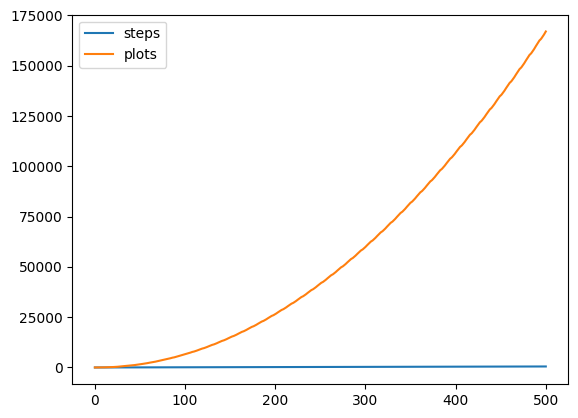

In [3]:
sample.plot()

In [5]:
plots = sample['plots'].to_numpy()

In [6]:
plots

array([     1,      2,      4,      6,      9,     13,     16,     22,
           30,     41,     50,     63,     74,     89,     99,    115,
          129,    145,    165,    192,    216,    234,    261,    294,
          326,    353,    395,    427,    460,    491,    537,    574,
          605,    644,    689,    740,    784,    846,    894,    944,
          989,   1053,   1107,   1146,   1196,   1256,   1324,   1383,
         1464,   1528,   1594,   1653,   1735,   1805,   1853,   1914,
         1988,   2072,   2145,   2244,   2324,   2406,   2479,   2579,
         2665,   2722,   2794,   2882,   2982,   3069,   3186,   3282,
         3380,   3467,   3585,   3687,   3753,   3836,   3938,   4054,
         4155,   4290,   4402,   4516,   4617,   4753,   4871,   4946,
         5040,   5156,   5288,   5403,   5556,   5684,   5814,   5929,
         6083,   6217,   6301,   6406,   6536,   6684,   6813,   6984,
         7128,   7274,   7403,   7575,   7725,   7818,   7934,   8078,
      

In [84]:
dplots = diff(plots)
dplots[:64]

array([  1,   2,   2,   3,   4,   3,   6,   8,  11,   9,  13,  11,  15,
        10,  16,  14,  16,  20,  27,  24,  18,  27,  33,  32,  27,  42,
        32,  33,  31,  46,  37,  31,  39,  45,  51,  44,  62,  48,  50,
        45,  64,  54,  39,  50,  60,  68,  59,  81,  64,  66,  59,  82,
        70,  48,  61,  74,  84,  73,  99,  80,  82,  73, 100,  86])

In [73]:
np.cumsum(np.concatenate((plots[0:1], dplots)))[:36]

array([  1,   2,   4,   6,   9,  13,  16,  22,  30,  41,  50,  63,  74,
        89,  99, 115, 129, 145, 165, 192, 216, 234, 261, 294, 326, 353,
       395, 427, 460, 491, 537, 574, 605, 644, 689, 740])

In [75]:
plots[0] + sum(dplots[:11])

63

In [77]:
plots[0] + sum(dplots[:11]) + sum(dplots[11:22])

261

In [85]:
dplots[:11]

array([ 1,  2,  2,  3,  4,  3,  6,  8, 11,  9, 13])

In [86]:
dplots[11:22]

array([11, 15, 10, 16, 14, 16, 20, 27, 24, 18, 27])

In [87]:
dplots[22:33]

array([33, 32, 27, 42, 32, 33, 31, 46, 37, 31, 39])

In [88]:
dplots[33:44]

array([45, 51, 44, 62, 48, 50, 45, 64, 54, 39, 50])

In [93]:
cols = 11
for cycle in range(10):
    print(" ".join([f"{v:4d}" for v in dplots[cols*cycle:cols*(cycle+1)]]))

   1    2    2    3    4    3    6    8   11    9   13
  11   15   10   16   14   16   20   27   24   18   27
  33   32   27   42   32   33   31   46   37   31   39
  45   51   44   62   48   50   45   64   54   39   50
  60   68   59   81   64   66   59   82   70   48   61
  74   84   73   99   80   82   73  100   86   57   72
  88  100   87  117   96   98   87  118  102   66   83
 102  116  101  135  112  114  101  136  118   75   94
 116  132  115  153  128  130  115  154  134   84  105
 130  148  129  171  144  146  129  172  150   93  116


In [140]:
def extrapolate(vals, cols, at) -> int:
    tcycle = at // cols
    tcol = at % cols
    print(f"at: {at} -> cycle {tcycle}, col {tcol}\n")
    
    dval = []
    ncycle = len(vals) // cols
    for cycle in range(ncycle):
        row = []
        for col in range(cols):
            i = cols *(cycle) + col
            row.append(vals[i+1] - vals[i])
        dval.append(row)
    
    for cycle in range(min(10, ncycle)):
        print(" ".join([f"{vals[col]:4d}" for col in range(cycle*cols, (cycle+1)*cols)]))
    print()
    
    for cycle in range(min(10, ncycle)):
        print(" ".join([f"{dval[cycle][col]:4d}" for col in range(cols)]))
    print()

    start = ncycle - 1
    assert start > 1
    ddval = [dval[start][col] - dval[start-1][col] for col in range(cols)]
    ddval1 = [dval[start-1][col] - dval[start-2][col] for col in range(cols)]
    while all([ddval[col] == ddval1[col] for col in range(cols)]) and start > 1:
        start -= 1
        ddval = ddval1
        ddval1 = [dval[start-1][col] - dval[start-2][col] for col in range(cols)]
    
    print(" ".join([f"{ddval[col]:4d}" for col in range(cols)]))
    print(f"start: {start}")

    if tcycle < start:
        return vals[at]

    base = vals[start * cols]
    result = base
    print(f"base: start*cols = {start}*{cols} = {base}")
    
    result += (tcycle - start) * sum(dval[start])
    print(f"tcycle - start = {tcycle} - {start} = {tcycle - start}")
    
    dval_start = " ".join([f"{dval[start][col]:4d}" for col in range(cols)])
    print(f"sum(dval[start]) = sum([{dval_start}]) = {sum(dval[start])}")
    print(f"(tcycle - start) * sum(dval[start]) = {tcycle -start} * {sum(dval[start])} = {(tcycle - start) * sum(dval[start])}\n")

    ddval_start = " ".join([f"{ddval[col]:4d}" for col in range(cols)])
    result += (tcycle - start)*(tcycle - start - 1)*sum(ddval)//2
    print(f"sum(ddval) = sum([{ddval_start}]) = {(tcycle - start)*(tcycle - start - 1)*sum(ddval)//2}\n")

    result += sum(dval[start][:tcol]) + (tcycle - start) * sum(ddval[:tcol])
    ddval_tcol = " ".join([f"{ddval[col]:4d}" for col in range(tcol)])
    print(f"(tcycle - start) * sum(ddval[:tcol] = {tcycle -start} * sum({ddval_tcol}) = {(tcycle - start) * sum(ddval[:tcol])}\n")

    return result

extrapolate(plots, 11,450), plots[450]

at: 450 -> cycle 40, col 10

   1    2    4    6    9   13   16   22   30   41   50
  63   74   89   99  115  129  145  165  192  216  234
 261  294  326  353  395  427  460  491  537  574  605
 644  689  740  784  846  894  944  989 1053 1107 1146
1196 1256 1324 1383 1464 1528 1594 1653 1735 1805 1853
1914 1988 2072 2145 2244 2324 2406 2479 2579 2665 2722
2794 2882 2982 3069 3186 3282 3380 3467 3585 3687 3753
3836 3938 4054 4155 4290 4402 4516 4617 4753 4871 4946
5040 5156 5288 5403 5556 5684 5814 5929 6083 6217 6301
6406 6536 6684 6813 6984 7128 7274 7403 7575 7725 7818

   1    2    2    3    4    3    6    8   11    9   13
  11   15   10   16   14   16   20   27   24   18   27
  33   32   27   42   32   33   31   46   37   31   39
  45   51   44   62   48   50   45   64   54   39   50
  60   68   59   81   64   66   59   82   70   48   61
  74   84   73   99   80   82   73  100   86   57   72
  88  100   87  117   96   98   87  118  102   66   83
 102  116  101  135  112  114  101 

(135197, 135197)

In [141]:
extrapolate(plots, 11, 5000)

at: 5000 -> cycle 454, col 6

   1    2    4    6    9   13   16   22   30   41   50
  63   74   89   99  115  129  145  165  192  216  234
 261  294  326  353  395  427  460  491  537  574  605
 644  689  740  784  846  894  944  989 1053 1107 1146
1196 1256 1324 1383 1464 1528 1594 1653 1735 1805 1853
1914 1988 2072 2145 2244 2324 2406 2479 2579 2665 2722
2794 2882 2982 3069 3186 3282 3380 3467 3585 3687 3753
3836 3938 4054 4155 4290 4402 4516 4617 4753 4871 4946
5040 5156 5288 5403 5556 5684 5814 5929 6083 6217 6301
6406 6536 6684 6813 6984 7128 7274 7403 7575 7725 7818

   1    2    2    3    4    3    6    8   11    9   13
  11   15   10   16   14   16   20   27   24   18   27
  33   32   27   42   32   33   31   46   37   31   39
  45   51   44   62   48   50   45   64   54   39   50
  60   68   59   81   64   66   59   82   70   48   61
  74   84   73   99   80   82   73  100   86   57   72
  88  100   87  117   96   98   87  118  102   66   83
 102  116  101  135  112  114  101

16733044

In [98]:
for cycle in range(1, 10):
    print(" ".join([f"{dplots[i]-dplots[i-cols]:4d}" for i in range(cols*cycle, cols*(cycle+1))]))

  10   13    8   13   10   13   14   19   13    9   14
  22   17   17   26   18   17   11   19   13   13   12
  12   19   17   20   16   17   14   18   17    8   11
  15   17   15   19   16   16   14   18   16    9   11
  14   16   14   18   16   16   14   18   16    9   11
  14   16   14   18   16   16   14   18   16    9   11
  14   16   14   18   16   16   14   18   16    9   11
  14   16   14   18   16   16   14   18   16    9   11
  14   16   14   18   16   16   14   18   16    9   11


In [83]:
ddplots = diff(diff(plots))
ddplots[:64]

array([  1,   0,   1,   1,  -1,   3,   2,   3,  -2,   4,  -2,   4,  -5,
         6,  -2,   2,   4,   7,  -3,  -6,   9,   6,  -1,  -5,  15, -10,
         1,  -2,  15,  -9,  -6,   8,   6,   6,  -7,  18, -14,   2,  -5,
        19, -10, -15,  11,  10,   8,  -9,  22, -17,   2,  -7,  23, -12,
       -22,  13,  13,  10, -11,  26, -19,   2,  -9,  27, -14, -29])

In [79]:
np.cumsum(np.concatenate((dplots[0:1], ddplots)))[:36]

array([ 1,  2,  2,  3,  4,  3,  6,  8, 11,  9, 13, 11, 15, 10, 16, 14, 16,
       20, 27, 24, 18, 27, 33, 32, 27, 42, 32, 33, 31, 46, 37, 31, 39, 45,
       51, 44])

In [22]:
def lindiff(vals, cols=1):
    dv = diff(vals)
    ddv = diff(dv)
    for col in range(cols):
        dcol = diff(ddv[col::cols])
        ddcol = diff(diff(dcol))
        assert all([ddcol[-3:] == 0)
    return [diff(diff(vals[col::cols])) for col in range(cols)]

In [82]:
plots[:10] % 2 == 0

array([False,  True,  True,  True, False, False,  True,  True,  True,
       False])

In [47]:
500 % 11

5

In [50]:
dcol, ddcol = extrapolate(plots, 11, 200)

In [53]:
plots[0] + dcol[0] - plots[12]

12

In [9]:
diff(diff(diff(plots)))

array([  -1,    1,    0,   -2,    4,   -1,    1,   -5,    6,   -6,    6,
         -9,   11,   -8,    4,    2,    3,  -10,   -3,   15,   -3,   -7,
         -4,   20,  -25,   11,   -3,   17,  -24,    3,   14,   -2,    0,
        -13,   25,  -32,   16,   -7,   24,  -29,   -5,   26,   -1,   -2,
        -17,   31,  -39,   19,   -9,   30,  -35,  -10,   35,    0,   -3,
        -21,   37,  -45,   21,  -11,   36,  -41,  -15,   44,    1,   -4,
        -25,   43,  -51,   23,  -13,   42,  -47,  -20,   53,    2,   -5,
        -29,   49,  -57,   25,  -15,   48,  -53,  -25,   62,    3,   -6,
        -33,   55,  -63,   27,  -17,   54,  -59,  -30,   71,    4,   -7,
        -37,   61,  -69,   29,  -19,   60,  -65,  -35,   80,    5,   -8,
        -41,   67,  -75,   31,  -21,   66,  -71,  -40,   89,    6,   -9,
        -45,   73,  -81,   33,  -23,   72,  -77,  -45,   98,    7,  -10,
        -49,   79,  -87,   35,  -25,   78,  -83,  -50,  107,    8,  -11,
        -53,   85,  -93,   37,  -27,   84,  -89,  -

In [ ]:
diff(diff(diff(diff(plots))))

### Part 2

In [10]:
sample2 = pd.read_csv("part.csv")

In [11]:
plots2 = sample2['plots'].to_numpy()

In [12]:
plots2

array([     1,      4,      8,     16,     23,     32,     41,     56,
           64,     86,     99,    124,    140,    168,    187,    223,
          241,    277,    300,    344,    370,    419,    441,    493,
          522,    580,    609,    673,    699,    758,    794,    856,
          902,    967,   1008,   1085,   1125,   1214,   1257,   1350,
         1394,   1488,   1542,   1648,   1690,   1795,   1839,   1946,
         1989,   2108,   2153,   2276,   2317,   2453,   2509,   2640,
         2686,   2826,   2883,   3021,   3082,   3231,   3331,   3495,
         3594,   3755,   3858,   4023,   4130,   4264,   4370,   4508,
         4612,   4762,   4863,   5029,   5127,   5299,   5392,   5571,
         5674,   5856,   5961,   6136,   6251,   6420,   6553,   6714,
         6853,   7019,   7161,   7331,   7479,   7663,   7809,   7992,
         8134,   8311,   8473,   8654,   8827,   8995,   9184,   9348,
         9535,   9710,   9903,  10088,  10281,  10478,  10664,  10843,
      

In [13]:
diff(plots2)

array([   3,    4,    8,    7,    9,    9,   15,    8,   22,   13,   25,
         16,   28,   19,   36,   18,   36,   23,   44,   26,   49,   22,
         52,   29,   58,   29,   64,   26,   59,   36,   62,   46,   65,
         41,   77,   40,   89,   43,   93,   44,   94,   54,  106,   42,
        105,   44,  107,   43,  119,   45,  123,   41,  136,   56,  131,
         46,  140,   57,  138,   61,  149,  100,  164,   99,  161,  103,
        165,  107,  134,  106,  138,  104,  150,  101,  166,   98,  172,
         93,  179,  103,  182,  105,  175,  115,  169,  133,  161,  139,
        166,  142,  170,  148,  184,  146,  183,  142,  177,  162,  181,
        173,  168,  189,  164,  187,  175,  193,  185,  193,  197,  186,
        179,  191,  175,  204,  196,  204,  203,  198,  205,  221,  189,
        220,  190,  228,  193,  229,  206,  227,  223,  227,  225,  222,
        242,  219,  241,  216,  244,  224,  235,  227,  239,  252,  235,
        270,  240,  273,  242,  258,  225,  265,  2

In [14]:
diff(diff(plots2))

array([   1,    4,   -1,    2,    0,    6,   -7,   14,   -9,   12,   -9,
         12,   -9,   17,  -18,   18,  -13,   21,  -18,   23,  -27,   30,
        -23,   29,  -29,   35,  -38,   33,  -23,   26,  -16,   19,  -24,
         36,  -37,   49,  -46,   50,  -49,   50,  -40,   52,  -64,   63,
        -61,   63,  -64,   76,  -74,   78,  -82,   95,  -80,   75,  -85,
         94,  -83,   81,  -77,   88,  -49,   64,  -65,   62,  -58,   62,
        -58,   27,  -28,   32,  -34,   46,  -49,   65,  -68,   74,  -79,
         86,  -76,   79,  -77,   70,  -60,   54,  -36,   28,  -22,   27,
        -24,   28,  -22,   36,  -38,   37,  -41,   35,  -15,   19,   -8,
         -5,   21,  -25,   23,  -12,   18,   -8,    8,    4,  -11,   -7,
         12,  -16,   29,   -8,    8,   -1,   -5,    7,   16,  -32,   31,
        -30,   38,  -35,   36,  -23,   21,   -4,    4,   -2,   -3,   20,
        -23,   22,  -25,   28,  -20,   11,   -8,   12,   13,  -17,   35,
        -30,   33,  -31,   16,  -33,   40,  -32,   

In [29]:
ddplots2 = diff(diff(plots2))

In [142]:
extrapolate(plots2, 131, 26501365)

at: 26501365 -> cycle 202300, col 65

   1    4    8   16   23   32   41   56   64   86   99  124  140  168  187  223  241  277  300  344  370  419  441  493  522  580  609  673  699  758  794  856  902  967 1008 1085 1125 1214 1257 1350 1394 1488 1542 1648 1690 1795 1839 1946 1989 2108 2153 2276 2317 2453 2509 2640 2686 2826 2883 3021 3082 3231 3331 3495 3594 3755 3858 4023 4130 4264 4370 4508 4612 4762 4863 5029 5127 5299 5392 5571 5674 5856 5961 6136 6251 6420 6553 6714 6853 7019 7161 7331 7479 7663 7809 7992 8134 8311 8473 8654 8827 8995 9184 9348 9535 9710 9903 10088 10281 10478 10664 10843 11034 11209 11413 11609 11813 12016 12214 12419 12640 12829 13049 13239 13467 13660 13889 14095 14322 14545 14772
14997 15219 15461 15680 15921 16137 16381 16605 16840 17067 17306 17558 17793 18063 18303 18576 18818 19076 19301 19566 19799 20090 20331 20624 20876 21175 21421 21715 21956 22238 22488 22782 23043 23343 23586 23922 24141 24499 24730 25094 25322 25678 25922 26298 26517 26895 27098 2

605247138198755